## Loading images from directory as dataset

In [1]:
img_width, img_height = 100, 100
input_shape = (img_width, img_height, 1)
batch_size = 32
output_classes = 62

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255,
                                     shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_ds = train_generator.flow_from_directory(
    directory="./train",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

validation_ds = data_generator.flow_from_directory(
    directory="./val",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

test_ds = test_generator.flow_from_directory(
    directory="./test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

Found 2356 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Found 372 images belonging to 62 classes.


## Building CNN model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten

# Define the model
model = Sequential()

# Layer 1: Convolutional layer with 96 filters
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=input_shape, activation='relu'))

# Layer 2: Max pooling layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Layer 3: Zero padding layer
model.add(ZeroPadding2D(padding=(2,2)))

# Layer 4: Convolutional layer with 256 filters
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))

# Layer 5: Max pooling layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Layer 6: Zero padding layer
model.add(ZeroPadding2D(padding=(1,1)))

# Layer 7: Convolutional layer with 384 filters
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Layer 8: Zero padding layer
model.add(ZeroPadding2D(padding=(1,1)))

# Layer 9: Convolutional layer with 384 filters
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Layer 10: Zero padding layer
model.add(ZeroPadding2D(padding=(1,1)))

# Layer 11: Convolutional layer with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Layer 12: Max pooling layer
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Layer 13: Flatten layer
model.add(Flatten())

# Layer 14: Fully connected layer with 4096 units
model.add(Dense(4096, activation='relu'))

# Layer 15: Dropout layer
model.add(Dropout(0.5))

# Layer 16: Fully connected layer with 4096 units
model.add(Dense(4096, activation='relu'))

# Layer 17: Dropout layer
model.add(Dropout(0.5))

# Layer 18: Output layer with 62 layers
model.add(Dense(output_classes, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                        

In [5]:
from keras import optimizers
# model.compile(
#     optimizers.RMSprop(learning_rate=0.0001),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )

model.compile(
    optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train/Fit the model

In [6]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=6,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [8]:
epochs_range = 100
# Train the model
history = model.fit(train_ds, batch_size=32, 
                    epochs=epochs_range,callbacks=None,
                    validation_data=validation_ds)

Epoch 1/100
74/74 [==============================] - 118s 2s/step - loss: 3.3455 - accuracy: 0.0789 - val_loss: 2.9728 - val_accuracy: 0.1466
Epoch 2/100
74/74 [==============================] - 118s 2s/step - loss: 2.9796 - accuracy: 0.1371 - val_loss: 2.5451 - val_accuracy: 0.2243
Epoch 3/100
74/74 [==============================] - 118s 2s/step - loss: 2.6418 - accuracy: 0.1948 - val_loss: 2.2281 - val_accuracy: 0.3109
Epoch 4/100
74/74 [==============================] - 140s 2s/step - loss: 2.2302 - accuracy: 0.3098 - val_loss: 1.7451 - val_accuracy: 0.4619
Epoch 5/100
74/74 [==============================] - 146s 2s/step - loss: 1.8206 - accuracy: 0.4325 - val_loss: 1.5578 - val_accuracy: 0.5235
Epoch 6/100
74/74 [==============================] - 146s 2s/step - loss: 1.5141 - accuracy: 0.5025 - val_loss: 1.4908 - val_accuracy: 0.5264
Epoch 7/100
74/74 [==============================] - 122s 2s/step - loss: 1.2199 - accuracy: 0.6121 - val_loss: 0.9937 - val_accuracy: 0.6760
Epoch 

## Plot the result

In [9]:
import matplotlib.pyplot as plt

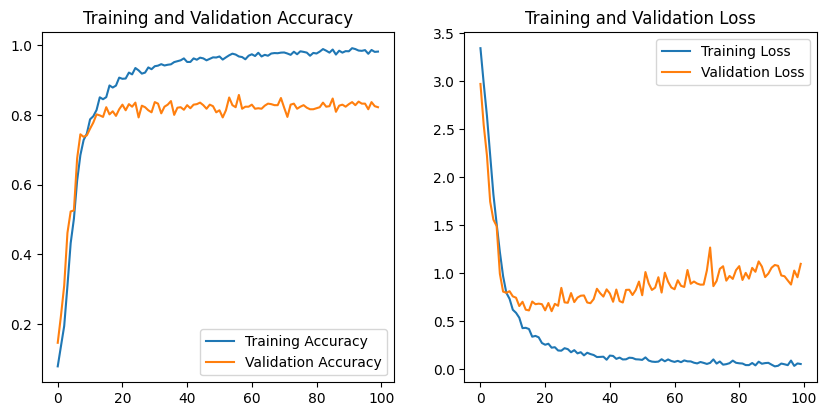

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the model

In [11]:
# Save the model as model.h5
model.save('model_alexnet.h5')

In [12]:
# Print the class indices 
print("Prediction Dict: ", train_ds.class_indices)

Prediction Dict:  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '7': 59, '8': 60, '9': 61}
